In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Args

In [3]:
PLATFORM = "IONTORRENT"
EXP = "exp3"
PRJ = "venn_TCR-MHC-CD8"

In [4]:
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'10x'

# Plotting dir

In [93]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" + EXP + "_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/" + PRJ + "/"
FIG_SUND = ("/Volumes/sund/Public/T-cells-and-cancer/herpov/plots/" +
            EXP + "_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/" + PRJ + "/")

# Input data

In [5]:
f_bc_c = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/KMA-1t1/output/mapping.clean.gz"
f_bc_ca = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/KMA-1t1/output/mapping.clean." + BARCODE_SYSTEM + ".augmented.gz"

In [6]:
f_tcr_r = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv"
f_tcr_ca = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_TCR/augmented/tcr.clean.augmented.csv"

In [7]:
merged = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/tables/tcr_barcode.xlsx"

In [8]:
merged_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/tables/tcr_barcode.augmented.csv"

# Import input

In [69]:
bc_c = pd.read_csv(f_bc_c)#.gem.unique() , usecols=['gem']

In [10]:
bc_ca = pd.read_csv(f_bc_ca, sep="\t")#, usecols=['gem']).gem.unique() , usecols=['gem', 'credible_alignment_mhc', 'credible_alignment_cd8']

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
tcr_r = pd.read_csv(f_tcr_r, usecols=['barcode']).barcode.unique()

In [12]:
tcr_ca = pd.read_csv(f_tcr_ca) #.gem.unique() , usecols=['gem']

In [13]:
merged_df = pd.read_excel(merged, dtype={'single_TRA':object, 'single_TRB':object})

In [14]:
credible_df = pd.read_csv(merged_annotations)

In [26]:
unique_tcrs = np.loadtxt("unique_tcrs.lst", dtype='int32')
unique_gems = np.loadtxt("unique_gems.lst", dtype='U20')

# Main

In [71]:
bc_ca

,gem,credible_alignment_mhc,credible_alignment_cd8,template_id_mhc,read_counts_mhc,read_count_diff_mhc,single_barcode_mhc,read_counts_lst_mhc,template_lst_mhc,template_id_cd8,...,v38,v39,v4,v40,v41,v5,v6,v7,v8,v9
0,AAACCTGAGGAACTGC-1,True,True,A1067B297_sample,109.0,1.000,True,[109],['A1067B297_sample'],A4000B297_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCTGAGGTCATCT-1,True,True,A1065B288_sample,48.0,0.979,False,[ 1 48],['A1064B288_sample' 'A1065B288_sample'],A4000B288_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAACCTGAGTCATCCA-1,True,True,A1071B288_sample,36.0,1.000,True,[36],['A1071B288_sample'],A4000B288_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACCTGAGTTCGATC-1,True,NaN,A1064B288_sample,15.0,1.000,True,[15],['A1064B288_sample'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,AAACCTGCAAGCCATT-1,True,NaN,A1071B292_sample,58.0,1.000,True,[58],['A1071B292_sample'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,TTGACTTTCATGCTCC-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B288_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7872,TTGCGTCTCTCTAAGG-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B301_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7873,TTTATGCAGCCTCGTG-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B301_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7874,TTTGGTTTCTATCCTA-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B302_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
credible_df.shape

(2670, 152)

In [29]:
merged_df.shape

(7876, 144)

In [40]:
merged_df[~merged_df.gem.isin(credible_df.gem)].credible_alignment_cd8.sum()

2226.0

In [49]:
merged_df[(merged_df.credible_alignment_cd8 == 1) & (merged_df.credible_alignment_mhc == 1)].clonotype.isnull().sum()

1200

In [50]:
merged_df[(merged_df.credible_alignment_cd8 == 1) & (merged_df.credible_alignment_mhc == 1)].shape

(2839, 144)

In [83]:
merged_df[(~merged_df.gem.isin(unique_gems)) & (~merged_df.cdr3_TRA.isna()) & (~merged_df.cdr3_TRB.isna())]

,gem,clonotype,cdr3_TRA,cdr3_nt_TRA,cdr3_TRB,cdr3_nt_TRB,umis_TRA,umis_diff_TRA,single_TRA,umis_lst_TRA,...,v38,v39,v4,v40,v41,v5,v6,v7,v8,v9
5,AAACCTGTCATCTGCC-1,clonotype1,CAVRSAYSGAGSYQLTF,TGTGCTGTGCGTTCTGCATACTCTGGGGCTGGGAGTTACCAACTCA...,CASRPRVAGGRNEQFF,TGTGCCAGCAGACCCAGAGTAGCGGGAGGGCGCAATGAGCAGTTCTTC,29.0,1.000,True,[29],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AAACCTGTCCATGAGT-1,None,CAAGGGGNKLTF,TGTGCAGCTGGGGGAGGAGGAAACAAACTCACCTTT,CASSWRGSSSYEQYF,TGTGCCAGCAGTTGGAGGGGCTCCAGCTCCTACGAGCAGTACTTC,2.0,1.000,True,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,AAAGTAGCAATCCGAT-1,clonotype9,CALNTGGFKTIF,TGTGCGCTGAATACTGGAGGCTTCAAAACTATCTTT,CASSPPFLAGSGSSYEQYF,TGTGCCAGCAGCCCCCCCTTTTTAGCTGGTAGCGGGAGCTCCTACG...,4.0,1.000,True,[4],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,AACCGCGAGATATGCA-1,clonotype565,CGTAVEGGSNYKLTF,TGTGGCACAGCTGTCGAGGGAGGTAGCAACTATAAACTGACATTT,CASSRRERGRGEAFF,TGTGCCAGCAGCCGTAGGGAGAGGGGGCGAGGTGAAGCTTTCTTT,2.0,1.000,True,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,AACGTTGAGTGCAAGC-1,clonotype2,CAAKSDSGGGADGLTF,TGTGCAGCAAAATCGGATTCAGGAGGAGGTGCTGACGGACTCACCTTT,CASSAWTSNRDEQFF,TGTGCCAGCAGCGCCTGGACTAGTAATCGGGATGAGCAGTTCTTC,6.0,1.000,True,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,TTGCGTCCAATCGAAA-1,clonotype2698,CAVNELHTGRRALTF,TGTGCCGTGAACGAGCTCCACACGGGCAGGAGAGCACTTACTTTT,CASSSGTSGYNEQFF,TGTGCCAGCAGCTCCGGGACTAGCGGATACAATGAGCAGTTCTTC,7.0,0.857,False,[1 7],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,TTGTAGGCATTTGCCC-1,clonotype2713,CAVSDNTDKLIF,TGTGCTGTGAGTGATAACACCGACAAGCTCATCTTT,CASRRQGATQPQHF,TGTGCCAGCAGGCGACAGGGGGCGACTCAGCCCCAGCATTTT,10.0,1.000,True,[10],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3730,TTTACTGAGCTGAAAT-1,clonotype40,CAATLNSGGGADGLTF,TGTGCAGCAACCCTTAATTCAGGAGGAGGTGCTGACGGACTCACCTTT,CASSYSYAGGTHEQFF,TGTGCCAGCAGTTACTCGTATGCGGGAGGGACGCATGAGCAGTTCTTC,18.0,1.000,True,[18],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3742,TTTCCTCGTAGGCTGA-1,clonotype222,CADLKPGGTSYGKLTF,TGTGCAGACCTCAAGCCGGGTGGTACTAGCTATGGAAAGCTGACATTT,CASSSGPHYEQYF,TGTGCCAGTAGTAGTGGCCCACACTACGAGCAGTACTTC,13.0,0.923,False,[ 1 13],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
credible_df[(~credible_df.gem.isin(unique_gems)) & (~credible_df.cdr3_TRA.isna())]

,Unnamed: 0,gem,clonotype,cdr3_TRA,cdr3_nt_TRA,cdr3_TRB,cdr3_nt_TRB,umis_TRA,umis_diff_TRA,single_TRA,...,v7,v8,v9,num_clonotype,single_tcell,umis_tcr,peptide_HLA,gems_per_specificity,gems_per_clonotype,binding_concordance
35,35,AACACGTGTATATGAG-1,clonotype553,CAVRDISARLMF,TGTGCTGTGAGAGACATAAGTGCCAGACTCATGTTT,NaN,NaN,2.0,0.500,False,...,NaN,NaN,NaN,553,False,NaN,NLVPMVATV A0201,1,1,1.0
121,121,AATCCAGTCAGCTCTC-1,clonotype238,CAGARSYQLTF,TGTGCAGGAGCTCGGAGTTACCAACTCACTTTC,NaN,NaN,4.0,1.000,True,...,NaN,NaN,NaN,238,False,NaN,ELRSRYWAI B0801,1,2,0.5
255,255,ACGGGTCCAGAGCCAA-1,clonotype251,CAGQYGGSQGNLIF,TGTGCAGGGCAATATGGAGGAAGCCAAGGAAATCTCATCTTT,NaN,NaN,5.0,1.000,True,...,NaN,NaN,NaN,251,False,NaN,GILGFVFTL A0201,1,2,0.5
275,275,ACTGAACTCGAGGTAG-1,clonotype764,CARNTGNQFYF,TGTGCCCGGAACACCGGTAACCAGTTCTATTTT,NaN,NaN,2.0,1.000,True,...,NaN,NaN,NaN,764,False,NaN,NLVPMVATV A0201,1,1,1.0
401,401,AGCGTATAGGAGTTTA-1,clonotype872,CVFMDSNYQLIW,TGTGTTTTCATGGATAGCAACTATCAGTTAATCTGG,NaN,NaN,5.0,1.000,True,...,NaN,NaN,NaN,872,False,NaN,VTEHDTLLY A0101,1,1,1.0
790,790,CAGTCCTGTGGCCCTA-1,clonotype418,CALSELGTNAGKSTF,TGTGCTCTGAGTGAGCTGGGCACCAATGCAGGCAAATCAACCTTT,NaN,NaN,4.0,1.000,True,...,NaN,NaN,NaN,418,False,NaN,VTEHDTLLY A0101,1,1,1.0
819,819,CATCGAAAGCGATGAC-1,clonotype1213,CVVNEGAGNQFYF,TGTGTGGTGAACGAGGGAGCGGGTAACCAGTTCTATTTT,NaN,NaN,4.0,1.000,True,...,NaN,NaN,NaN,1213,False,NaN,AGYLMELCC A0201,1,1,1.0
827,827,CATCGGGGTTGGTAAA-1,clonotype1222,CAVRDNFGNEKLTF,TGTGCTGTCAGAGACAACTTTGGAAATGAGAAATTAACCTTT,NaN,NaN,9.0,1.000,True,...,NaN,NaN,NaN,1222,False,NaN,FLYALALLL A0201,1,1,1.0
983,983,CCTCTGATCTGTACGA-1,clonotype1354,CAMREFTTDSWGKLQF,TGTGCAATGAGAGAGTTTACAACTGACAGCTGGGGGAAATTGCAGTTT,NaN,NaN,6.0,1.000,True,...,NaN,NaN,NaN,1354,False,NaN,NLVPMVATV A0201,1,1,1.0
1003,1003,CGAACATAGACTACAA-1,clonotype1371,CAYRSFSYNDMRF,TGTGCTTATAGGAGCTTTTCTTACAATGACATGCGCTTT,NaN,NaN,4.0,1.000,True,...,NaN,NaN,NaN,1371,False,NaN,AMLGTHTMEV A0201,1,1,1.0


In [72]:
gems_bc = set(bc_c.gem)
gems_mhc = set(bc_c[~bc_c.template_id.str.contains('A4000', na = False)].gem.unique())
gems_cd8 = set(bc_c[bc_c.template_id.str.contains('A4000', na = False)].gem.unique())
gems_mhc_c = set(bc_c[(~bc_c.template_id.str.contains('A4000', na = False)) & (bc_c.credible_alignment == True)].gem.unique())
gems_cd8_c = set(bc_c[(bc_c.template_id.str.contains('A4000', na = False)) & (bc_c.credible_alignment == True)].gem.unique())

In [73]:
tcr_ca['num_clonotype'] = pd.to_numeric(tcr_ca['clonotype'].fillna('None').str.split('clonotype').str[1], errors='coerce').replace(np.nan, 0, regex=True).astype(int)

In [74]:
gems_tcr_r = set(tcr_r)
gems_tcr_v = set(tcr_ca.gem.unique())
gems_tcr_c = set(tcr_ca.drop(tcr_ca[tcr_ca.num_clonotype == 0].index).gem.unique())

# Venn

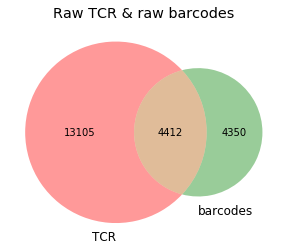

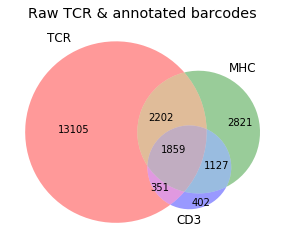

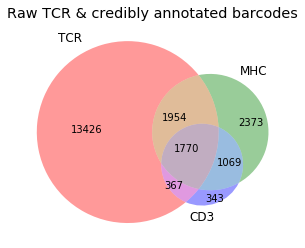

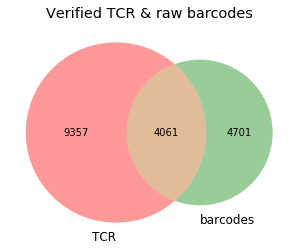

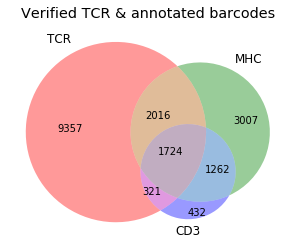

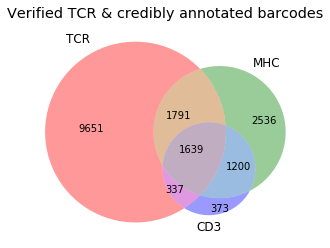

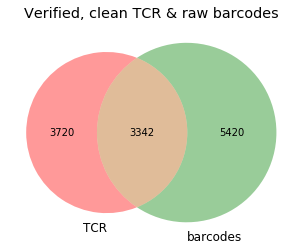

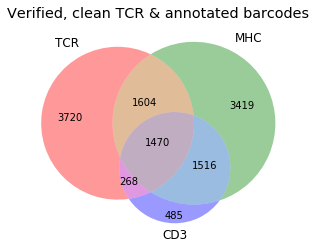

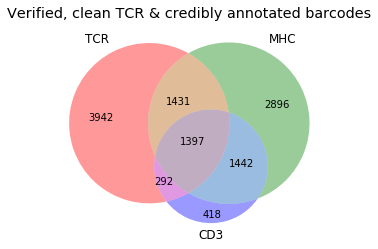

In [75]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2

version=1
name = 1
for a, a_tit in [(gems_tcr_r, "Raw TCR"), (gems_tcr_v, "Verified TCR"), (gems_tcr_c, "Verified, clean TCR")]:
    for c,b,tit in [(set(), gems_bc, "raw barcodes"), (gems_cd8, gems_mhc, "annotated barcodes"), (gems_cd8_c, gems_mhc_c, "credibly annotated barcodes")]:
        
        if tit == "raw barcodes":
            ab = len(a.intersection(b))
            a_b = len(a) - ab
            b_a = len(b) - ab

            title = "Venn of MHC annotations"
            venn2(subsets = (a_b, b_a, ab), set_labels = ('TCR', 'barcodes'))
            title = a_tit + " & " + tit
            plt.title(title)
            #plt.savefig(FIG_SUND + "v%i.%i.raw.pdf" %(version, name), bbox_inches='tight')
            plt.show()
            
        else:
            ab = a.intersection(b)
            ac = a.intersection(c)
            bc = b.intersection(c)

            abc = len(ab.intersection(c))
            ab_c = len(ab) - abc
            ac_b = len(ac) - abc
            bc_a = len(bc) - abc
            a_bc = len(a) - ab_c - ac_b - abc
            b_ac = len(b) - ab_c - bc_a - abc
            c_ab = len(c) - ac_b - bc_a - abc

            venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('TCR', 'MHC', 'CD3'))
            title = a_tit + " & " + tit
            plt.title(title)
            #plt.savefig(FIG_SUND + "v%i.%i.pdf" %(version, name), bbox_inches='tight')
            plt.show()
            
        name+=1

In [76]:
1431+1397

2828

In [31]:
1431+1397+292+418+1442+2896

7876

In [42]:
1431+1397

2828

In [85]:
remain = list(ab - set(unique_gems))

In [89]:
merged_df[merged_df.gem.isin(remain)].head(n=50)

,gem,clonotype,cdr3_TRA,cdr3_nt_TRA,cdr3_TRB,cdr3_nt_TRB,umis_TRA,umis_diff_TRA,single_TRA,umis_lst_TRA,...,v38,v39,v4,v40,v41,v5,v6,v7,v8,v9
2,AAACCTGCAGCATGAG-1,clonotype520,NaN,NaN,CASSLEGRDTEAFF,TGTGCCAGCAGCTTGGAGGGAAGGGACACTGAAGCTTTCTTT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AAAGATGAGTGTGAAT-1,clonotype95,NaN,NaN,CASSLVLLGDNEQFF,TGTGCCAGCAGCTTAGTGTTACTAGGGGACAATGAGCAGTTCTTC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,AAAGCAAAGGACACCA-1,clonotype13,NaN,NaN,CASSPLSLNTEAFF,TGTGCCAGCAGCCCGCTTAGCTTGAACACTGAAGCTTTCTTT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,AAATGCCGTGTTGAGG-1,clonotype545,NaN,NaN,CSARVLDSPGYEQYF,TGCAGTGCTAGAGTCCTGGACAGTCCGGGCTACGAGCAGTACTTC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,AACACGTAGCAGACTG-1,clonotype15,NaN,NaN,CSAHPPGQGWEKLFF,TGCAGTGCCCACCCACCTGGACAGGGGTGGGAAAAACTGTTTTTT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,AACACGTGTATATGAG-1,clonotype553,CAVRDISARLMF,TGTGCTGTGAGAGACATAAGTGCCAGACTCATGTTT,NaN,NaN,2.0,0.500,False,[1 2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,AACACGTGTCTCATCC-1,clonotype35,NaN,NaN,CSARDLLQRGGPYNEQFF,TGCAGTGCTAGAGATCTTTTACAGCGGGGGGGCCCCTACAATGAGC...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,AACACGTGTTCATGGT-1,clonotype25,NaN,NaN,CSGDLGRQNTEAFF,TGCAGCGGGGACTTAGGACGGCAGAACACTGAAGCTTTCTTT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,AACCGCGAGATATGCA-1,clonotype565,CGTAVEGGSNYKLTF,TGTGGCACAGCTGTCGAGGGAGGTAGCAACTATAAACTGACATTT,CASSRRERGRGEAFF,TGTGCCAGCAGCCGTAGGGAGAGGGGGCGAGGTGAAGCTTTCTTT,2.0,1.000,True,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,AACCGCGAGTCCATAC-1,clonotype19,NaN,NaN,CASSLEGGGTPYEQYF,TGTGCCAGCAGCTTAGAGGGAGGGGGGACCCCCTACGAGCAGTACTTC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
